In [1]:
import numpy as np
import torch
import random
from sklearn.metrics import mean_squared_error
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.nn import MSELoss

Dataset creation

In [2]:
no_sample=5000
min_size=2
max_size=10

input=[]
y=[]

for i in range(no_sample):
   var_len=torch.randint(min_size,max_size,(1,))
   inp_array=torch.rand(var_len,2)
   inp_array[:,1]=0
   x=random.sample(range(0,var_len),2)
   inp_array[x[0]][1]=1
   inp_array[x[1]][1]=1
   label=inp_array[x[0]][0]+inp_array[x[1]][0]
   y.append(label)
   input.append(inp_array)

Defining the baseline loss

In [3]:
def baseline(Y):
    l = 0
    for i in Y:
        l += (1-i)**2
    return l/len(Y)

In [4]:
baseline_loss=baseline(y)

Elmon 

In [5]:

bias = torch.rand((3, 1), requires_grad=True)
bias_2=torch.rand(1,requires_grad=True)
wt_mat_1 = torch.rand((3,3),requires_grad=True)
wt_mat_2 = torch.rand((3,2),requires_grad=True)
wt_mat_3 = torch.rand((1,3),requires_grad=True)
optimizer=optim.SGD([wt_mat_1,wt_mat_2,wt_mat_3,bias_2,bias],lr=0.01)
loss=[]


def Elmon(inp):
  for k in range(10):
    j=0
    curr_loss = 0
    for arr in inp:
      memory=torch.tensor([0,0,0],dtype=torch.float32)
      length=len(arr)
      for i in range(length):
          inp_mat=torch.tensor([arr[i][0],arr[i][1]])

          m_out=torch.matmul(memory,wt_mat_1)+torch.matmul(wt_mat_2,inp_mat)+bias.T
          memory=torch.sigmoid(m_out)

      
      m_out_2 = torch.matmul(memory, wt_mat_3.T) + bias_2
      error=torch.mean(torch.square(y[j]-m_out_2))
      error.backward()
      curr_loss+=error
      
      optimizer.step()
      optimizer.zero_grad()

      j+=1
    print(curr_loss/5000)
    loss.append(curr_loss.detach().numpy()/5000)


In [6]:
      
Elmon(input)
#printing the loss after each epoch


tensor(0.1787, grad_fn=<DivBackward0>)
tensor(0.1714, grad_fn=<DivBackward0>)
tensor(0.1671, grad_fn=<DivBackward0>)
tensor(0.1610, grad_fn=<DivBackward0>)
tensor(0.1573, grad_fn=<DivBackward0>)
tensor(0.1550, grad_fn=<DivBackward0>)
tensor(0.1528, grad_fn=<DivBackward0>)
tensor(0.1505, grad_fn=<DivBackward0>)
tensor(0.1480, grad_fn=<DivBackward0>)
tensor(0.1448, grad_fn=<DivBackward0>)


plotting the graph for elmon


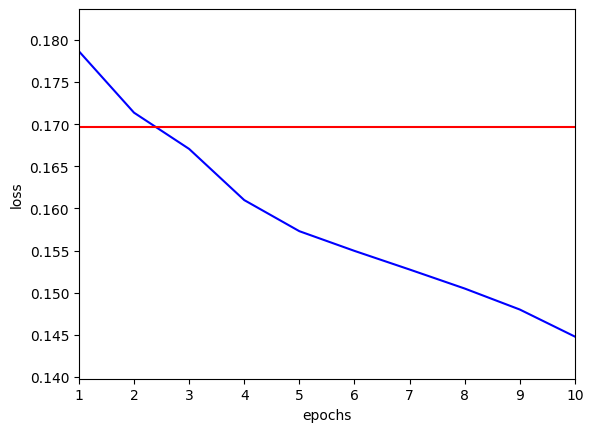

In [7]:
b_y_1=[baseline_loss for i in range(0,10)]
epochs=[i for i in range (1,11)]
plt.ylim(min(loss)-0.005,max(loss)+0.005)
plt.xlim(1,10)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,loss,color='blue',label='elmon')
plt.plot(epochs,b_y_1,color='red',label='baseline')

GRU

In [8]:
weights=torch.randn((9,1),requires_grad=True)
bias_gru=torch.randn((3,1),requires_grad=True)
optimizer=optim.SGD([weights,bias_gru],lr=0.05)
loss_gru=[]

def GRU(inp):
  for i in range(10):
    j=0
    curr_loss=0
    for arr in inp:
      memory=0
      length=len(arr)
      for i in range(length):
        m_out_1=memory*weights[0]+arr[i][0]*weights[1]+arr[i][1]*weights[2]+bias_gru[0]
        act_out_1=torch.sigmoid(m_out_1)
        
        m_out_2=memory*weights[3]+arr[i][0]*weights[4]+arr[i][1]*weights[5]+bias_gru[1]
        act_out_2=torch.sigmoid(m_out_2)
        
        m_out_3=memory*act_out_1*weights[6]+arr[i][0]*weights[7]+arr[i][1]*weights[8]+bias_gru[2]
        act_out_3=torch.tanh(m_out_3)
        
        memory=memory*(1-act_out_2)+act_out_2*act_out_3
        
        
      error=MSELoss()(memory,y[j])
      curr_loss+=error
      error.backward(retain_graph=True)
      optimizer.step()
      optimizer.zero_grad()
      j+=1
    print(curr_loss/5000)
    loss_gru.append(curr_loss.detach().numpy()/5000)

In [9]:
GRU(input)
#printing the loss after each epoch

/home/shreyas/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.1500, grad_fn=<DivBackward0>)
tensor(0.1395, grad_fn=<DivBackward0>)
tensor(0.1233, grad_fn=<DivBackward0>)
tensor(0.1092, grad_fn=<DivBackward0>)
tensor(0.1028, grad_fn=<DivBackward0>)
tensor(0.0996, grad_fn=<DivBackward0>)
tensor(0.0976, grad_fn=<DivBackward0>)
tensor(0.0963, grad_fn=<DivBackward0>)
tensor(0.0953, grad_fn=<DivBackward0>)
tensor(0.0945, grad_fn=<DivBackward0>)


Graph for GRU

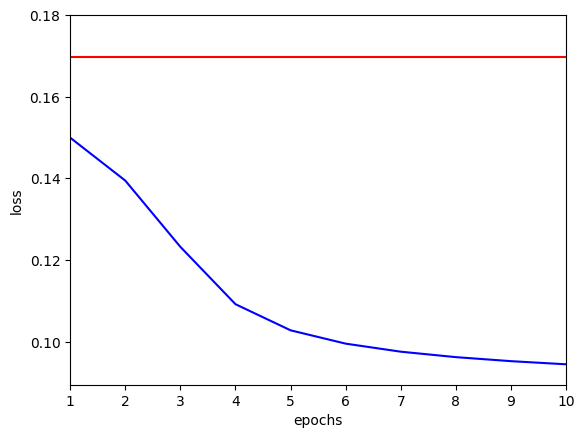

In [10]:
b_y_2=[baseline_loss for i in range(0,10)]
plt.ylim(min(loss_gru)-0.005,0.18)
plt.xlim(1,10)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,loss_gru,color='blue',label='gru')
plt.plot(epochs,b_y_2,color='red',label='baseline')

LSTM 

In [11]:
vect_2=torch.randn((4,1),requires_grad=True)
vect_3=torch.randn((4,1),requires_grad=True)
vect_4=torch.randn((4,1),requires_grad=True)
vect_5=torch.randn((4,1),requires_grad=True)
optimizer=optim.SGD([vect_2,vect_3,vect_4,vect_5],lr=0.05)
loss_lstm=[]
torch.autograd.set_detect_anomaly(True)


def LSTM(inp):
  for i in range(10):
    j=0
    curr_loss=0
    
    for arr in inp:
      short_term_mem=0
      long_term_mem=0
      length=len(arr)
      
      for i in range(length):
        
        vect_1=torch.tensor([short_term_mem,arr[i][0],arr[i][1],1])
        m_out_1=torch.matmul(vect_1.T,vect_2)
        act_out_1=torch.sigmoid(m_out_1)
        forget_out=long_term_mem*act_out_1
        
        
        m_out_2=torch.matmul(vect_1.T,vect_3)
        act_out_2=torch.sigmoid(m_out_2)
        
        
        m_out_3=torch.matmul(vect_1.T,vect_4)
        act_out_3=torch.tanh(m_out_3)
        x_out=act_out_2*act_out_3
        long_term_mem=forget_out+x_out
        
        
        m_out_4=torch.matmul(vect_1.T,vect_5)
        act_out_4=torch.sigmoid(m_out_4)
        act_out_5=torch.tanh(long_term_mem)
        x_out_2=act_out_4*act_out_5
        short_term_mem=x_out_2

      error=torch.mean(torch.square(y[j]-short_term_mem))
      error.backward(retain_graph=True)
      curr_loss+=error
      optimizer.step()
      optimizer.zero_grad()
      j+=1     
    print(curr_loss/5000)
    loss_lstm.append(curr_loss.detach().numpy()/5000)
    
LSTM(input)
#printing loss after each epoch


/tmp/ipykernel_3891/1994707339.py:23: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  m_out_1=torch.matmul(vect_1.T,vect_2)


tensor(0.1746, grad_fn=<DivBackward0>)
tensor(0.1628, grad_fn=<DivBackward0>)
tensor(0.1584, grad_fn=<DivBackward0>)
tensor(0.1560, grad_fn=<DivBackward0>)
tensor(0.1547, grad_fn=<DivBackward0>)
tensor(0.1538, grad_fn=<DivBackward0>)
tensor(0.1532, grad_fn=<DivBackward0>)
tensor(0.1527, grad_fn=<DivBackward0>)
tensor(0.1524, grad_fn=<DivBackward0>)
tensor(0.1522, grad_fn=<DivBackward0>)


Graph for LSTM

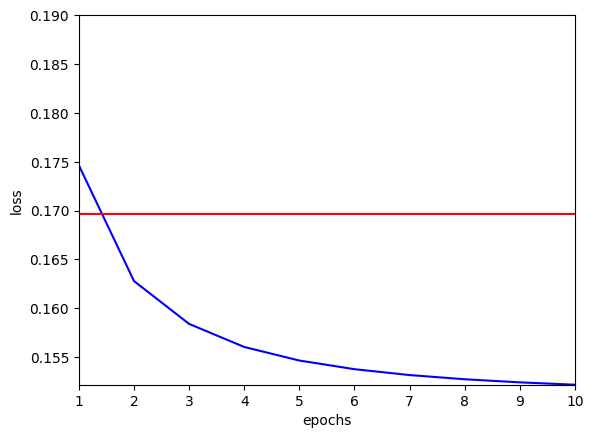

In [12]:
b_y_3=[baseline_loss for i in range(0,10)]
plt.ylim(min(loss_lstm),0.19)
plt.xlim(1,10)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,loss_lstm,color='blue',label='lstm')
plt.plot(epochs,b_y_3,color='red',label='baseline')